See go/flax-air

### JAX Fundamentals

Now is a good moment to open the JAX documentation in a separate tab:

https://jax.readthedocs.io

#### Initialization

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Check connected accelerators. Depending on what runtime you're connected to,
# this will show a single CPU/GPU, or 8 TPU cores (jf_2x2 aka JellyDonut).

# You can start a TPU runtime via : "Connect to a runtime" -> "Start" ->
# "Borg Runtime" -> "Brain Frameworks JellyDonut (go/ml-colab)"
# https://screenshot.googleplex.com/87HTCpQNhBKUZUp
# See also http://go/research-workflow-intro-deck#colab
jax.devices()

[PjRtTpuDevice(id=0, host_id=0, coords=(0,0,0), core_on_chip=0),
 PjRtTpuDevice(id=1, host_id=0, coords=(0,0,0), core_on_chip=1),
 PjRtTpuDevice(id=2, host_id=0, coords=(1,0,0), core_on_chip=0),
 PjRtTpuDevice(id=3, host_id=0, coords=(1,0,0), core_on_chip=1),
 PjRtTpuDevice(id=4, host_id=0, coords=(0,1,0), core_on_chip=0),
 PjRtTpuDevice(id=5, host_id=0, coords=(0,1,0), core_on_chip=1),
 PjRtTpuDevice(id=6, host_id=0, coords=(1,1,0), core_on_chip=0),
 PjRtTpuDevice(id=7, host_id=0, coords=(1,1,0), core_on_chip=1)]

In [ ]:
# Local devices: In this case it's the same as all devices, but if you run JAX
# in a multi host setup, then local_devices will only show the devices connected
# to the host running the program.
jax.local_devices()

[PjRtTpuDevice(id=0, host_id=0, coords=(0,0,0), core_on_chip=0),
 PjRtTpuDevice(id=1, host_id=0, coords=(0,0,0), core_on_chip=1),
 PjRtTpuDevice(id=2, host_id=0, coords=(1,0,0), core_on_chip=0),
 PjRtTpuDevice(id=3, host_id=0, coords=(1,0,0), core_on_chip=1),
 PjRtTpuDevice(id=4, host_id=0, coords=(0,1,0), core_on_chip=0),
 PjRtTpuDevice(id=5, host_id=0, coords=(0,1,0), core_on_chip=1),
 PjRtTpuDevice(id=6, host_id=0, coords=(1,1,0), core_on_chip=0),
 PjRtTpuDevice(id=7, host_id=0, coords=(1,1,0), core_on_chip=1)]

In [ ]:
# Alternatively, you can also connect to GPU runtime.
!nvidia-smi

/bin/sh: nvidia-smi: command not found


#### Randomness

https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html#%F0%9F%94%AA-Random-Numbers


<center>
<img src="https://live.staticflickr.com/3127/2875827736_2224e426c6_w.jpg" width="400" height="300" alt="Green Tree Python"><br>
<i>CC BY Image by <a href="https://www.flickr.com/photos/tedmurphy/">Ted Murphy</a></i>
</center>


In [ ]:
# YOUR ACTION REQUIRED:
# Your task is to use JAX to generate 5 uniform random numbers and 5 normally
# distributed random numbers.

# Check out the following JAX API calls:
# - jax.random.PRNGKey()
# - jax.random.split()
# - jax.random.uniform()
# - jax.random.normal()

##-snip
# Create initial key from seed.
key = jax.random.PRNGKey(0)
# Derive two keys for consumption and another key to continue the chain.
key1, key2, key = jax.random.split(key, 3)
# Generate some random numbers using the first key.
print(jax.random.uniform(key1, shape=(5,)))
# Generate some random numbers using the second key.
print(jax.random.normal(key2, shape=(5,)))

# Note: using the same key for both random numbers would be a mistake, because
# then both vectors would use the same key and there are no guarantees with
# respect to their independence.

[0.1252873  0.02237558 0.83836806 0.82412434 0.38652325]
[-0.64391863  0.07092397 -0.2470687  -1.057074    0.13556837]


#### `jnp` vs. `np`

<center>
<img src="https://live.staticflickr.com/2828/9578749884_d93a4a1315_w.jpg" width="400" height="255" alt="steam forever"><br>
<i>CC BY Image by <a href="https://www.flickr.com/photos/h-studio/">targut</a></i>
</center>


In [ ]:
# Let's do some semi-serious matrix multiplication:
k = 3_000
x = np.random.normal(size=[k, k])
# ~3.4s
%time x @ x

CPU times: user 2.35 s, sys: 16 ms, total: 2.37 s
Wall time: 2.37 s


array([[ -46.28066977,   11.35294462,  -11.95715758, ...,    4.13460615,
         -28.39691633,  -67.08623321],
       [ -56.06628128, -118.69125234,  -19.12654581, ...,  -81.85798712,
          38.68220825,   31.14132371],
       [ -55.75723054,  -29.08318693,  -63.99392113, ...,   -2.9280346 ,
         -19.07768706,   65.11818916],
       ...,
       [ -46.98717565,   53.99080585,   47.8796869 , ...,  -18.91981076,
         -40.43737338,   15.78576061],
       [  76.0289938 ,  -49.47216149,   38.24874394, ...,  -94.33544392,
         101.42438977,  -82.43652372],
       [ -67.78545972,    7.14331359,  -97.59488811, ...,   -4.83372553,
           2.73935695,  -49.52092656]])

In [ ]:
# YOUR ACTION REQUIRED: Do the same computation using JAX!
# You should use result.block_until_ready() for a fair comparison.
##-snip
x = jax.random.normal(jax.random.PRNGKey(0), [k, k])
# 201 ms on TPU
%time (x@x).block_until_ready()

CPU times: user 815 ms, sys: 2.69 ms, total: 818 ms
Wall time: 822 ms


DeviceArray([[ 38.375317, -21.0246  ,  42.664158, ..., -36.84205 ,
              -16.638084, 120.2195  ],
             [ 53.475822,   8.369665, -38.94782 , ...,  10.590559,
              -68.711914,   1.945715],
             [-26.465311,  -8.921974,  37.035046, ...,  53.59578 ,
              -43.16165 ,  13.983183],
             ...,
             [ 16.283106,  67.18446 ,  53.673855, ...,  22.90127 ,
               31.392447,  85.10547 ],
             [ 97.00985 , -98.17281 ,  41.025414, ..., -24.279696,
               25.458023,  76.61342 ],
             [-23.025066,  16.083858,  33.15876 , ...,  33.482998,
               73.54208 ,  30.782677]], dtype=float32)

In [ ]:
# Note the different class of the JAX array. There is additional API e.g. to
# determine on which device the data is stored, check out x.device_buffer
##-snip
x.device_buffer.device()

PjRtTpuDevice(id=0, host_id=0, coords=(0,0,0), core_on_chip=0)

In [ ]:
# Combining jnp & np : Below array initialization is rather slow because we
# create a lot of jnp array. Replace jnp with np and observe the speedup!
%%time
# GPU : 1.79s
# CPU : 1.04s
x = jnp.array([jnp.arange(100) for _ in range(10000)])
print(repr(x))
# YOUR ACTION REQUIRED:
# In this situation we would want to create the array in np and then convert it
# to a jnp array using jnp.array() or jax.device_put().
# (Note that we could use np.tile() here, but that's not the point)
##-snip
# GPU : 0.03s
# CPU : 0.03s
x = np.array([np.arange(100) for _ in range(10000)])
print(repr(x))
# GPU : 0.03s
# CPU : 0.03s
x = jnp.array(np.array([np.arange(100) for _ in range(10000)]))
print(repr(x))
# GPU : 0.03s
# CPU : 0.03s
x = jax.device_put(np.array([np.arange(100) for _ in range(10000)]))
print(repr(x))

DeviceArray([[ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             ...,
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99]], dtype=int32)
array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])
DeviceArray([[ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             ...,
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99]], dtype=int32)
DeviceArray([[ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             [ 0,  1,  2, ..., 97, 98, 99],
             ...,
             [ 0,

#### `grad()`

<center>
<img src="https://live.staticflickr.com/8573/15246394073_0cfdcc458b_w.jpg" width="400" height="221" alt="Gradient"><br>
<i>CC BY Image by <a href="https://www.flickr.com/photos/60506610@N08/">Manel Torralba</a></i>
</center>

https://jax.readthedocs.io/en/latest/jax.html#automatic-differentiation

In [ ]:
def sigmoid(x):
    return 0.5 * (1 + jnp.tanh(x))


# YOUR ACTION REQUIRED:
# Use grad() to create a new function that computes the gradient of `sigmoid`.
# Verify the output of the new function at some points.
##-snip
sigmoid_grad = jax.grad(sigmoid)
for x in (-10.0, 0.0, 10.0):
    print(x, sigmoid_grad(x))

-10.0 0.0
0.0 0.5
10.0 0.0


In [ ]:
def f(x, y):
    return 2 * x * y ** 2


# YOUR ACTION REQUIRED:
# Compute df/dx and df/dy with grad()
##-snip
(
    jax.grad(f)(2.0, 3.0),  # argnums=0 is the default
    jax.grad(f, argnums=1)(
        2.0, 3.0
    ),  # specify to take gradient wrt 2nd argument
    jax.grad(lambda y, x: f(x, y))(2.0, 3.0),  # same result using a lambda
)

(DeviceArray(18., dtype=float32),
 DeviceArray(24., dtype=float32),
 DeviceArray(24., dtype=float32))

#### `vmap()`

<center>
<img src="https://live.staticflickr.com/65535/49164406707_a954dc465f_w.jpg" width="400" height="225" alt="Les Tanji, éléments majeurs du paysage urbain coréen (Daejeon, Corée du sud)"><br>
<i>CC BY Image by <a href="https://www.flickr.com/photos/dalbera/">Jean-Pierre Dalbéra</a></i>
</center>

https://jax.readthedocs.io/en/latest/jax.html#vectorization-vmap

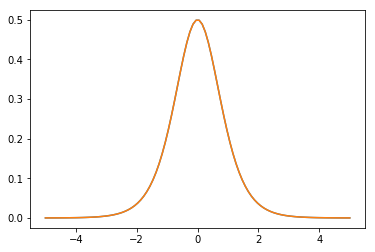

In [ ]:
# Now let's plot the gradient of the sigmoid function in the range [05, 5]
xs = jnp.linspace(-5, 5, 100)
# We can of course evaluate the gradient at every position separately:
grads = [jax.grad(sigmoid)(x) for x in xs]
plt.plot(xs, grads)
# But JAX can "vectorize" our gradient function for us automatically.
# YOUR ACTION REQUIRED:
# Read the documentation about `vmap` and reimplement the plot without a Python
# loop.
##-snip
plt.plot(xs, jax.vmap(jax.grad(sigmoid))(xs));

In [ ]:
# Another vmap() example : Let's re-implement matmul using vector dot product:
vdp = lambda v1, v2: v1.dot(v2)
# Vector dot product:
vdp(jnp.arange(1, 4), jnp.arange(1, 4))
# Matrix vector product:
mvp = jax.vmap(vdp, in_axes=(0, None), out_axes=0)
# Matrix matrix product:
mmp = jax.vmap(mvp, in_axes=(None, 1), out_axes=1)

# Verify result.
m1 = jnp.arange(12).reshape((3, 4))
m2 = m1.reshape((4, 3))
# In case you were wondering : Since Python 3.5 we have `.__matmul__()` operator
# that happens to use the same character as for decorators (cf. `@jit` below).
mmp(m1, m2) - m1 @ m2

# YOUR ACTION REQUIRED:
# It's curry time!
# Try re-implementing mvp() but this time without using the in_axes=, and
# out_axes=. Instead use lambda expressions to (un)curry the arguments in such
# a way that vmap()'s default in_axes=0 and out_axes=0 does the job.
# (You can also re-implement mmp() this way, but it involves transposing).
##-snip
mvp_ = lambda m, v: jax.vmap(lambda x: vdp(x, v))(m)
print(mvp(m1, m2[:, 0]) - mvp_(m1, m2[:, 0]))
mmp_ = lambda m1, m2: jax.vmap(lambda x: mvp_(m1, x))(m2.T).T
mmp_(m1, m2) - m1 @ m2

[0 0 0]


DeviceArray([[0, 0, 0],
             [0, 0, 0],
             [0, 0, 0]], dtype=int32)

#### `jit()`

<center>
<img src="https://live.staticflickr.com/3803/9540184355_0dee2f496a_w.jpg" width="400" height="267" alt="Silicon Village"><br>
<i>CC BY Image by <a href="https://www.flickr.com/photos/jackofspades/">Jack Spades</a></i>
</center>

https://jax.readthedocs.io/en/latest/jax.html#just-in-time-compilation-*jit*

In [ ]:
# JAX would not have the final X in it's name if it were not for XLA, the
# magic sauce that somehow takes computation defined in a function as input
# and produces a much faster version of it.

# @jax.jit
def f(x):
    y = x
    for _ in range(10):
        y = y - 0.1 * y + 3.0
    return y[:100, :100]


x = jax.random.normal(jax.random.PRNGKey(0), (5000, 5000))
%timeit f(x).block_until_ready()

# YOUR ACTION REQUIRED:
# Move your magic JAX wand and cast a spell by removing a single character from
# above example, drastically speeding up the computation!
# Note: JIT unrolls the for loop and converts all computations to XLA
# primitives. XLA is then smart enough to fuse kernels for multiplication and
# addition, and optimize the program to only compute those parts that are
# actually needed for the function result...

10 loops, best of 3: 37.4 ms per loop


In [ ]:
# Just to be clear : `@jit` is Python's decorator syntax [1], you can also use
# jit() like the other function transformations.
# [1] https://www.python.org/dev/peps/pep-0318


@jax.jit
def f1_jit(x):
    return x ** 0.5


def f2(x):
    return x ** 0.5


# It's really the same.
f2_jit = jax.jit(f2)

f1_jit(2) - f2_jit(2)

DeviceArray(0., dtype=float32)

In [ ]:
# What you need to understand about JIT (1/3): When a function is traced.


@jax.jit
def noop(x):
    # This statement only gets executed when the function is traced, i.e. every
    # time you execute the JIT-ted version with a new ShapedArray (different dtype
    # and/or different shape).
    print("Tracing noop:", x)
    return x


noop(jnp.arange(3))  # Tracing.
noop(jnp.arange(3) + 1)  # Using trace from cache.
noop(jnp.arange(4))  # Tracing.
noop(jnp.arange(4.0))  # Tracing.
noop(jnp.arange(1.0, 5.0))  # Using trace from cache.

Tracing noop: Traced<ShapedArray(int32[3])>with<DynamicJaxprTrace(level=0/1)>
Tracing noop: Traced<ShapedArray(int32[4])>with<DynamicJaxprTrace(level=0/1)>
Tracing noop: Traced<ShapedArray(float32[4])>with<DynamicJaxprTrace(level=0/1)>


DeviceArray([1., 2., 3., 4.], dtype=float32)

In [ ]:
# What you need to understand about JIT (2/3): Baking in environment.
magic_number = 13


@jax.jit
def add_magic(x):
    return x + magic_number


print(add_magic(np.array([0])))
magic_number = 42
print(add_magic(np.array([0])))
print(add_magic(np.array([0.0])))

[13]
[13]
[42.]


In [ ]:
# What you need to understand about JIT (2/3): Value-dependent flow.
def mult(x, n):
    print("Tracing mult:", x, n)
    tot = 0
    while n > 0:
        tot += x
        n -= 1
    return tot

In [ ]:
# The problem:

# The following statement fails, because : JIT will generate the function's XLA
# code by tracing it with `ShapedArray`'s. These arrays have only their shape
# and datatype defined. Hence, if there are any statements involving the actual
# *values* of the parameters, JIT does not know what to do and raises an
# exception.
# (Note that if mult were traced with `ConcreteArray`s then the trace would work
#  just fine; you can see that when executing `grad(mult)(3., 2.)`)
try:
    jax.jit(mult)(3, 2)
except Exception as e:
    print(f"\n### FAILED WITH : {e}")

# How can we fix this ??

Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>

### FAILED WITH : Abstract tracer value encountered where concrete value is expected.

The problem arose with the `bool` function. 

While tracing the function mult at <ipython-input-18-168d651ed123>:2, this concrete value was not available in Python because it depends on the value of the arguments to mult at <ipython-input-18-168d651ed123>:2 at flattened positions [1], and the computation of these values is being staged out (that is, delayed rather than executed eagerly).

You can use transformation parameters such as `static_argnums` for `jit` to avoid tracing particular arguments of transformed functions, though at the cost of more recompiles.

See https://jax.readthedocs.io/en/latest/faq.html#abstract-tracer-value-encountered-where-concrete-value-is-expected-error for more information.

Encountered tracer value:

In [ ]:
# Solution 1 : static_argnums
jax.jit(mult, static_argnums=1)(3, 4)
jax.jit(mult, static_argnums=1)(3, 5)
jax.jit(mult, static_argnums=1)(3, 6)

# By the way : did you notice how the function is traced exactly three times the
# first time this cell is executed, but not when you re-execute the same cell?
# That's because JIT-ted functions are cached. If You want to observe the
# tracing a second time, you first need to execute above cell so that `mult`
# gets redefined and the cache needs to be updated with the new definition.

Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 4
Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 5
Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 6


DeviceArray(18, dtype=int32)

In [ ]:
# Solution 2 : (un)currying

# YOUR ACTION REQUIRED:
# Use jit() without `static_argnums=`, but (un)curry the function mult instead.
##-snip
mult_jit = lambda x, n: jax.jit(lambda x: mult(x, n))(x)
mult_jit(3, 4)
mult_jit(3, 5)
mult_jit(3, 6)

Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 4
Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 5
Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 6


DeviceArray(18, dtype=int32)

In [ ]:
# Solution 3 : Use XLA primitives for control flow.

# Remember: You can inspect `jax.lax.while_loop()` docs by either:
# - Go to https://jax.readthedocs.io
# - Execute a cell containing `?jax.lax.while_loop`
# - Hover your mouse over `while_loop` and wait two seconds


def mult_(x, n):
    print("Tracing mult_:", x, n)

    def cond_fun(n_tot):
        n, tot = n_tot
        return n > 0

    def body_fun(n_tot):
        n, tot = n_tot
        return (n - 1, tot + x)

    return jax.lax.while_loop(cond_fun, body_fun, (n, 0))


jax.jit(mult_)(3, 4)
jax.jit(mult_)(3, 5)
jax.jit(mult_)(3, 6)

Tracing mult_: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)>


(DeviceArray(0, dtype=int32), DeviceArray(18, dtype=int32))

In [ ]:
# Woah! Wasn't JAX supposed to be fast !? What is going on here ??
# Also note that increasing the second number significantly will crash
# your runtime...
%%time
jax.jit(mult, static_argnums=1)(3, 5000)
##-snip
# JAX will unroll the loop before compiling it. Compiling a huge graph that has
# thousands of unrolled additions will take a long time, and at some point
# exhaust all memory, leading to a OOM crash.

Tracing mult: Traced<ShapedArray(int32[], weak_type=True)>with<DynamicJaxprTrace(level=0/1)> 5000
CPU times: user 2.31 s, sys: 2.48 ms, total: 2.31 s
Wall time: 2.31 s


DeviceArray(15000, dtype=int32)

In [ ]:
# Does this function have the same problems? Why not?
%%time
jax.jit(mult_)(3, 5000)
##-snip
# No unrolling is happening here. We simply have a single XLA instruction that
# is compiled as any other instruction.

CPU times: user 888 µs, sys: 0 ns, total: 888 µs
Wall time: 621 µs


(DeviceArray(0, dtype=int32), DeviceArray(15000, dtype=int32))

#### `pmap()`

<center>
<a href="https://storage.googleapis.com/gweb-cloudblog-publish/original_images/TPU_V3_POD_FULLFRONT_FORWEBONLY_FINAL.jpg" target="_blank"><img src="https://storage.googleapis.com/gweb-cloudblog-publish/original_images/TPU_V3_POD_FULLFRONT_FORWEBONLY_FINAL.jpg" width="800"  alt="Full TPUv3 (DragonFish) pod"></a><br>
<i>Full TPUv3 (DragonFish) pod (from <a href="https://cloud.google.com/blog/products/ai-machine-learning/cloud-tpu-pods-break-ai-training-records?hl=fr_ca&skip_cache=true">GoogleAI Blog</a>) - click to enlarge.</i>
</center>

https://jax.readthedocs.io/en/latest/jax.html#parallelization-pmap

In [ ]:
# Parallel computing is more fun with multiple devices :-)
# Go back to "Initialization" and connect to a different runtime if you're
# running on a single device.
assert jax.device_count() == 8, "Please connect to a JellyDonut runtime!"

In [ ]:
# By default in_axes=0, so pmap() will split every incoming tensor across it's
# first axis - which should be sized jax.local_device_count().
# The computations are then performed in parallel and the results are returned
# as a sharded device array. The dat remains on the individual accelerators.
# Note that pmap() also XLA-compiles the function, so no need to call jit().

# Generate 8 different random seeds.
keys = jax.random.split(jax.random.PRNGKey(0), 8)
# Generate 8 different random matrices. Data remains on devices.
mats = jax.pmap(lambda key: jax.random.normal(key, (8_000, 8_000)))(keys)
# Perform 8 matmuls in parallel.
results = jax.pmap(lambda m1, m2: m1 @ m2)(mats, mats)

# YOUR ACTION REQUIRED:
# Fetch the mean of thes matrices from every device and print it out here.
##-snip
jax.pmap(jnp.mean)(results)

ShardedDeviceArray([ 0.00185904, -0.00014661,  0.02134887,  0.01937939,
                     0.00734944,  0.00370082,  0.00958951,  0.00445661],                   dtype=float32)

In [ ]:
import functools

# Here we use jax.lax.psum() to do computations across devices. Note that these
# operations can cause a lot of communication costs. Below we split our 8
# devices along two axis (4x2).

# Note in particular that parallel operators work across hosts! We can't
# demonstrate this in a Colab, but you will encounter it later in the Flax
# examples and brain templates.

# You can read more about parallel operators here:
# https://jax.readthedocs.io/en/latest/jax.lax.html#parallel-operators

# axis 0 : rows
@functools.partial(jax.pmap, axis_name="rows")
# axis 1 : columns
@functools.partial(jax.pmap, axis_name="cols")
def f(x):
    # across the rows (= column sum)
    row_sum = jax.lax.psum(x, "rows")
    # across the cols (= row sum)
    col_sum = jax.lax.psum(x, "cols")
    total_sum = jax.lax.psum(x, ("rows", "cols"))
    return row_sum, col_sum, total_sum


# YOUR ACTION REQUIRED:
# Create an array, feed it to f() and verify the correctness of the results
##-snip
f(jnp.arange(8.0).reshape(4, 2))

(ShardedDeviceArray([[12., 16.],
                     [12., 16.],
                     [12., 16.],
                     [12., 16.]], dtype=float32),
 ShardedDeviceArray([[ 1.,  1.],
                     [ 5.,  5.],
                     [ 9.,  9.],
                     [13., 13.]], dtype=float32),
 ShardedDeviceArray([[28., 28.],
                     [28., 28.],
                     [28., 28.],
                     [28., 28.]], dtype=float32))

#### pytrees

<center>
<img src="https://live.staticflickr.com/4695/38641518410_53da16c2a9_w.jpg" width="400" height="300" alt="Green Tree Python"><br>
<i>CC BY Image by <a href="https://www.flickr.com/photos/markgillow/">Mark Gillow</a></i>
</center>

https://jax.readthedocs.io/en/latest/notebooks/JAX_pytrees.html

In [ ]:
# Whenever we encounter a function argument, e.g. the `params` for a model, or
# the first argument to `grad()` to whose respect we perform automatic
# differentiation, it can really be a "pytree" of `jnp.ndarray`. A pytree
# consists of an arbitrary combination of Python dict/list/tuple and allows us
# to structure our data hierarchically.

# This is a pytree:
data = dict(
    array_3x2=jnp.arange(6.0).reshape((3, 2)),
    mixed_tuple=(0.1, 0.2, 0.3, [1.0, 2.0, 3.0]),
    subdict=dict(
        array_3x4=jnp.arange(12.0).reshape((3, 4)),
        array_4x3=jnp.arange(12.0).reshape((4, 3)),
    ),
)

In [ ]:
# Call a function over all values, output resulting tree:
jax.tree_map(jnp.shape, data)

{'array_3x2': (3, 2),
 'mixed_tuple': ((), (), (), [(), (), ()]),
 'subdict': {'array_3x4': (3, 4), 'array_4x3': (4, 3)}}

In [ ]:
# Define a function that does some computation with the values:
def sumsquares(x):
    value_flat, value_tree = jax.tree_flatten(x)
    del value_tree  # not needed.
    tot = 0
    for value in value_flat:
        if isinstance(value, jnp.ndarray):
            value = value.sum()
        tot += value ** 2
    return tot


sumsquares(data)

DeviceArray(8951.141, dtype=float32)

In [ ]:
# Compute gradients. Remember that grad() computes gradients wrt the first
# argument, but that first argument can be an arbitrarily complex pytree (like
# all the weights in your hierarchical model).
grads = jax.grad(sumsquares)(data)
grads

{'array_3x2': DeviceArray([[30., 30.],
              [30., 30.],
              [30., 30.]], dtype=float32),
 'mixed_tuple': (DeviceArray(0.2, dtype=float32),
  DeviceArray(0.4, dtype=float32),
  DeviceArray(0.6, dtype=float32),
  [DeviceArray(2., dtype=float32),
   DeviceArray(4., dtype=float32),
   DeviceArray(6., dtype=float32)]),
 'subdict': {'array_3x4': DeviceArray([[132., 132., 132., 132.],
               [132., 132., 132., 132.],
               [132., 132., 132., 132.]], dtype=float32),
  'array_4x3': DeviceArray([[132., 132., 132.],
               [132., 132., 132.],
               [132., 132., 132.],
               [132., 132., 132.]], dtype=float32)}}

In [ ]:
# YOUR ACTION REQUIRED:
# Take a step against the gradients using `jax.tree_multimap()`
##-snip
data2 = jax.tree_multimap(lambda value, grad: value - 0.1 * grad, data, grads)
data2

{'array_3x2': DeviceArray([[-3., -2.],
              [-1.,  0.],
              [ 1.,  2.]], dtype=float32),
 'mixed_tuple': (DeviceArray(0.08, dtype=float32),
  DeviceArray(0.16, dtype=float32),
  DeviceArray(0.24000001, dtype=float32),
  [DeviceArray(0.8, dtype=float32),
   DeviceArray(1.6, dtype=float32),
   DeviceArray(2.4, dtype=float32)]),
 'subdict': {'array_3x4': DeviceArray([[-13.2      , -12.2      , -11.2      , -10.2      ],
               [ -9.2      ,  -8.2      ,  -7.2      ,  -6.2      ],
               [ -5.2      ,  -4.2      ,  -3.1999998,  -2.1999998]],            dtype=float32),
  'array_4x3': DeviceArray([[-13.2      , -12.2      , -11.2      ],
               [-10.2      ,  -9.2      ,  -8.2      ],
               [ -7.2      ,  -6.2      ,  -5.2      ],
               [ -4.2      ,  -3.1999998,  -2.1999998]], dtype=float32)}}

### end